0.08
0.07505227
0.07563429
0.07556761
0.07557526
0.07557439
0.075574495
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
1532.1222
0.068757944
0.076324895
0.07548786
0.075584434
0.07557334
0.07557461
0.075574465
0.07557449
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
1532.1222
0.068757944
0.076324895
0.07548786
0.075584434
0.07557334
0.07557461
0.075574465
0.07557449
0.07557448
1532.1222
0.068757944
0.076324895
0.07548786
0.075584434
0.07557334
0.07557461
0.075574465
0.07557449
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.07557448
0.0755

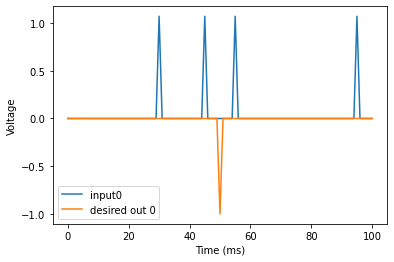

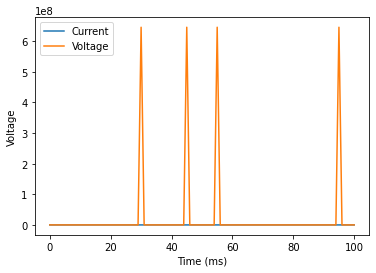

UO


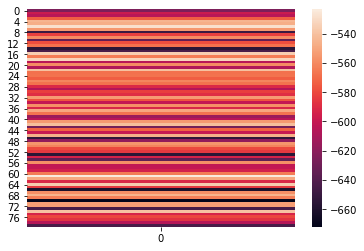

Wf


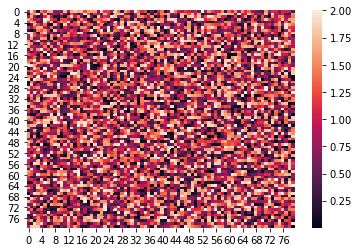

In [13]:
import math
import numpy as np
from matplotlib.pyplot import *
import seaborn as sns
from numpy import random

N = 80 #number of neurons

#Parameters for input current
A = 1 #amplitude
f1 = 1/45. #period T = 1200ms
f2 = 1/40. # T = 1500ms
deltat = 0.8
total_time = 101#int(120 / deltat)+1 #120ms
mini_batch_samples = 15

#Threshold voltages for input and output neurons
vthr=1
vthr_neg= -vthr
delta=0.5
v_reset = 0
#delta = 0.1*vthr
#vthr_out=0.005

#Time constants for fast and regular synapses
s_tau=25
f_tau=5
l_tau=20

#function to add label to graph
def addLabel():
    xlabel('Time (ms)')
    ylabel('Voltage')
    legend()

v_reset = 0

num_inputs = N
num_outputs = 1

# learning parameters
learning_rate = 0.01
lmbda = 0.1
max_epochs = 2
epoch_n = 0;
mini_batch_n = 1
costlambda = 0.2



# network parameters
I = np.zeros((N),np.float32)
I0 = np.zeros((N),np.float32) #tonic current

#between -1 to 1
Wo = 2.
W = Wo*np.random.random((N,N)).astype(np.float32) #- (Wo/2)
Uo = 4.
U = Uo*np.random.random((N,num_inputs)).astype(np.float32) #- (Uo/2)
v = np.zeros((N),np.float32)
g = np.zeros((N, total_time),np.float32)
s = np.zeros((N,total_time),np.float32)
# sf = np.zeros((N,total_time),np.float32)

pv = np.zeros((N,total_time),np.float32) 
ps = np.zeros((N,total_time),np.float32)
psdot = np.zeros((N,total_time),np.float32)

#gv = np.zeros((N,total_time),np.float32)
Oo = 0.1
#O = np.zeros((num_outputs,N),np.float32) 
O = Oo * np.random.random((num_outputs,N)).astype(np.float32) - (Oo/2)
o = np.zeros((num_outputs,total_time),np.float32)

dl_s = np.zeros((N),np.float32)

dW = np.zeros((N,N),np.float32)
dO = np.zeros((num_inputs,N),np.float32) 
dU = np.zeros((N,num_inputs), np.float32)
p0 = -1







## DEFINING THE INPUTS, GO-CUE, AND OD

inputs = np.zeros((N, total_time))
od = np.zeros((num_outputs, total_time))
go_cue = np.zeros((total_time))


def getOutput(x):
    temp = np.reshape(x, (int(total_time/25),2))    
    temp1 = np.where( np.logical_and( np.logical_and((temp[:,0]  == temp[:,1])  , (temp[:,0] != 0))  ,  (temp[:,1] != 0))    , -1, 0)
    temp2 = np.where(np.logical_and(np.logical_and((temp[:,0]  != temp[:,1]) , (temp[:,0] != 0)) , (temp[:,1] != 0)),1, 0)
    return temp1 + temp2


x = random.randint(3,size=(int(total_time/25 *2)))
x = [15./14 if y==0 else y for y in x]
x = [-15./14 if y==1 else y for y in x]
x = [0 if y==2 else y for y in x]

odI = getOutput(x)

index = 0
count  = 0
for t in range(0, len(x), 2):
    inputs[:,index+f_tau]=x[t]
    inputs[:,index+l_tau]=x[t+1]

    od[:,index+s_tau] = odI[count]
    go_cue[index+s_tau]=29./14
    
    index=index+s_tau
    count= count+1





# for plotting
plotTime = []
plotTime.append(time)
current = np.zeros((N,total_time),np.float32)

Ohalf = O
Wf = np.zeros((N,total_time),np.float32)
UO = np.zeros((N,N),np.float32)
V = np.ones((N,total_time),np.float32)


for it in range(max_epochs):
    plotTime = [*range(total_time)];# time = 0; plotTime.append(time)
    mini_batch_n = 1
        # zero out gradients
    dW = np.zeros((N,N),np.float32)
    dO = np.zeros((num_outputs,N),np.float32) 
    dU = np.zeros((N,num_inputs), np.float32)
    dI0 = np.zeros((N),np.float32)
    
## FORWARD FEED    
    for i in range(1,total_time):
        #print("Epoch: ", it, "feedforward: " , i)
#         np.fill_diagonal(W, 0)
        
        
    # fully connected network structure
        
        I = np.matmul(W,s[:,i]) + np.matmul(U,inputs[:,i]) +  I0
        current[:,i] =I[:]      
            
            # using XOR membrane dynamics
### NOT SURE -- IF THIS SHOULD BE ELEMENT-WISE OE MATRIX MULT
        v1 = np.matmul((1 - (np.cos(2*np.pi*V[:, i-1]))),I)
        v2 = (1+np.cos(2*np.pi*V[:, i-1]))/s_tau
        v = (v1 + v2)
        V[:,i] = v
        
            # gating and threshold
            # need to find elegant way for go-cue to integrate entire 25 ms interval
#         if (go_cue[i]):
        g[:,i] = np.where(np.logical_or( v > vthr, v >= -vthr),1.,0.)
        v[v>=vthr] = v_reset
        
        s[:,i] = s[:,i] + (-s[:,i] + g[:,i]*I)/s_tau     

        # print(s[1,i])   
        o[:,i] = np.einsum('jk,k->',O, s[:,i])

        
        
## BACKWARD IN TIME -- PMP            
        if (i == mini_batch_n * mini_batch_samples) or (i == total_time - 1):
            for j in range(i, (mini_batch_n - 1)*mini_batch_samples, -1):
                
                df_I = (1 - np.cos(2*np.pi*V[:, j]))
                fi = (1+np.cos(2*np.pi*V[:, i-1]))/s_tau   +    (1 - (np.cos(2*np.pi*V[:, i-1])))*current[:,i-1]
                # if (it == 1):
                #   print('O ', np.shape(O.T))
                #   print('o ', np.shape(o[:,j]))
                #   print('od ', np.shape(od[:,j]))

                dl_s = np.matmul(O.T,(o[:,j]-od[:,j]))  +  lmbda*s[:,j]
                psdot[:,j-1] = (ps[:,j] + dl_s +np.matmul(W.T, pv[:,j]*df_I))/s_tau          
                pvdot  = -(pv[:,j]*df_I) + g[:,j-1]*psdot[:,j-1]

            
            
            
#                 psdot[:,t_p+1] =  (ps[:,t_p+1]-  dl_s - pv[:,j]*df_I*W)/tau_s           
#                 pvdot = (pv[:,t_p+1]*df_I) + g[:,t_p+1]*psdot[:,t_p+1]
                
#                 dl_s= np.matmul(O.T,(o[j]-od[j])) +  lmbda*s[:,j]
                            
#                 psdot[:,j-1] = (ps[:,j] + dl_s  -  np.matmul(W.T, pv[:,j]))/s_tau
#                 pvdot =  -pv[:,j] + g[:,j]*psdot[:,j-1]
                
                ps[:,j] = psdot[:,j-1]
                pv[:,j] = pvdot 
            
       
            
            strt_col = (mini_batch_n-1)* mini_batch_samples
            end_col = i
                # different batch size on last time stampe
            if (i == total_time - 1):
                end_col = total_time
                
            pvLoc = pv[:, strt_col:end_col]
            sLoc = s[:,strt_col:end_col]
            oDif = o[:, strt_col:end_col]-od[:,strt_col:end_col]
            inLoc = inputs[:,strt_col:end_col]
            dfLoc = (1 - np.cos(2*np.pi*V[:, strt_col:end_col]))
            
              # gradint calculations
            dW_batch = (np.einsum('ik,jk->ij',pvLoc*dfLoc, sLoc) / s_tau)  # .reshape(N,N)
            dO_batch = p0* np.einsum('ik,jk->ij', oDif, sLoc)/ s_tau # reshape(num_input, N)
            dU_batch = (np.einsum('ik,jk->ij', dfLoc*pvLoc, inLoc) / s_tau)  # .reshape(N, num_input)
            dI0_batch= (np.einsum('jk->j', dfLoc*pvLoc) / s_tau)  # .reshape(N,1)
            
            norm = 1/(end_col - strt_col)
            
            dW = dW + dW_batch
            dO = dO + dO_batch
            dU = dU + dU_batch
            dI0 = dI0 + dI0_batch
            mini_batch_n += 1 

           
        
            # update after going through all the batches
        if i == total_time - 1:
              
            W = W +learning_rate*dW 
            O = O + learning_rate*dO
            U = U+learning_rate*dU
            I0  = I0 + learning_rate*dI0
            
            if(it == max_epochs/2):
                Ohalf = O
       
    if it == max_epochs-1:
        print("WithOUT 1 over num batch samples normalization")
        figure(1)
        plot(plotTime, inputs[0,:], label = 'input0')
        # plot(plotTime,o[0,:], label='output0')
        plot(plotTime,od[0,:], label='desired out 0')
#         plot(plotTime,.5*go_cue[:], label='go_cue')
        #plot(plotTime,s[0,:], label='s')
        addLabel()
        show()
  
        
        figure(3)
#        plot(plotTime,V[1,:], label='Voltage')
        # plot(plotTime,ps[1,:], label='Ps')
        # plot(plotTime,pv[1,:],label='Pv')
        plot(plotTime,current[1,:],label='Current')
        plot(plotTime,100000*V[1,:],label='Voltage')
        addLabel()
        show()
    
        
        UO = np.negative(np.matmul(U.T,O.T))
#        plot heatmap
        print("UO")
        figure(4)
        m1 = sns.heatmap(UO)
        show()
        
        print("Wf")
        figure(5)
        m3 = sns.heatmap(W)    
        show()

In [22]:
np.shape(x)

(12,)